# Equazioni differenziali ordinarie

Un'equazione differenziale che dipende da una sola variabile $x$ vine detta **ordinaria** (abbreviata in **EDO**). Qui ci occuperemo solo di EDO del primo ordine in quanto e' sempre possibile ricondurre un'EDO di ordine $n$ ad un sistema di EDO del primo ordine che sia equivalente. In questo senso e' quindi sufficiente imparare a risolvere equazioni del primo ordine, ovvero del tipo $\large y^{'}=g(x,y)$.

# Metodo di Eulero
Il metodo piu' semplice, detto di Eulero (matematico e fisico svizzero, 1707-1783), si basa sulla constatazione che 
l'EDO $ dy/dx=g(x,y)$ puo' essere espressa in questo modo: 
$$ \frac{dy}{dx}~=~\frac{y_{i+1}-y_i}{h}~+O(h)=~g(x_i,y_i)$$ 
da cui, ricavando $y_{i+1}$, si ottiene
$$ y_{i+1}=y_i+~h~g(x_i,y_i)~+~O(h^2) $$ 
che puo' essere utilizzata per il calcolo:

In [2]:
# soluzione della ordinary differential equation (ODE)
#      y'= -y + sin(x)     
# con il metodo di Eulero, adottando una "boundary initial condition"

# specifichiamo la funzione da usare
def f(x,y):
    """ 
    Questa funzione specifica l'equazione differenziale 
    da integrare. Per un test si puo' usare un caso in cui 
    esiste una soluzione analitica come p.es: 
                y'= x * sqrt(y) 
    la cui soluzione e'  y = [(x**2+4)**2]/16
    Per fare il test sostituire il return:
    return  x*np.sqrt(y)
    """
    # equazione differenziale da integrare:  
    #     y'= g(x,y) = -y + sin(x)
    return -y+np.sin(x) 


def eulero(f,x0=0.,y0=0.,xf=10.,n=101):
    """ Calcola la soluzione di un'eq.diff.ordinaria del primo ordine 
        fissate le condizioni iniziali. Usa il metodo di Eulero
    USO   : x,y = eulero(f,x0=...,y0=...,xf=...,n=...)
    INP   : f     rappresenta l'equazione differenziale  
            x0    valore iniziale da cui far partire la X
            y0    valore iniziale da cui far partire la Y
            xf    valore finale per la  X 
            n     numero di passi in cui suddividere il percorso 
                  tra x0 ed xf
    OUT   :
    """
    import  numpy  as  np
    import  matplotlib.pyplot  as  plt
    # condizioni iniziali prestabilite (sperimentare variando i valori)
    # x0 ed xf sono i valori iniziale e finale della X tra i quali 
    # valutare il comportamento della y che inizialmente vale y0: 

    deltax =  (xf-x0)/(n-1)

    x   = np.linspace(x0, xf, n) # divide l'intervallo x0-xf in n passi
    y   = np.zeros([n])          # preparo il vettore che conterra' le y    
    y[0]= y0                     # assegno il valore di partenza dato 
    for  i  in  range(1,n):
        y[i]=deltax*f(x[i-1],y[i-1]) + y[i-1]

    return x,y



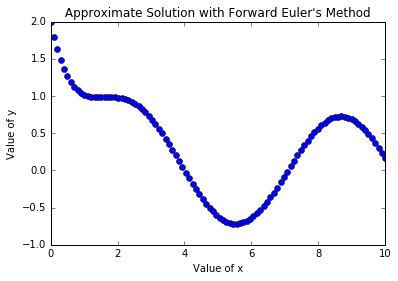

In [3]:
x,y=eulero(f,0,2,10.,100);
#for  i  in  range(n):     # per vedere i valori calcolati 
#    print(x[i],y[i])      # in ogni punto della soluzione 
plt.plot(x,y,'o')
plt.xlabel("Value of x" )
plt.ylabel("Value of y" )
plt.title(" Approximate Solution with Forward Euler's Method " )
plt.show()


# Il metodo di Runge-Kutta

Il metodo di Eulero non e' particolarmente conveniente dal punto di vista sia della rapidita' di convergenza che della accuratezza. Un metodo piu' conveniente (ed anche largamente usato) per risolvere EDO e' il cosiddetto **metodo di Runge-Kutta** che e' stato sviluppato con diversi gradi di accuratezza. L'approccio piu' semplice e' quello al secondo ordine che ora andiamo ad implementare.

### Runge-Kutta del secondo ordine

In [4]:
# Definiamo una function che utilizza i risultati ottenuti a lezione 
# (vedi eq.1.54 delle dispense) 

def rk2(f, x0 ,y0, xf ,n=101):  
    """ Metodo Runge-Kutta di ordine 2 per risolvere 
             y' = f(y,x)    con: y(x[0]) = y0.

    USAGE:
        y = rk2(f, x0, y0, xf, n=101)

    INPUT:
        f      - funzione di x ed y uguale a dy/dx.  y puo' avere piu' 
                 valori, nel qual caso: 
                   - y potra' essere una "list" o un "NumPy array"
                   - f dovra' produrre un NumPy array della stessa 
                       dimensione di y.
        y0     - condizione(i) iniziale(i).  Specifica il valore di y 
                 per x=x[0]. Puo' essere uno scalare oppure, se si  
                 tratt di risolvere un sistema di piu' equazioni, 
                 potra' essere una lista o un numpy array.
        x0,xf  - valore iniziale e finale per la x 
        n      - numero di punti in cui suddividere l'intervallo (xf-x0) 
                 nei quali calcolare la soluzione.
        
        NOTA: sarebbe possibile anche usare una serie di punti x NON 
              equispaziati. In questo caso la serie di punti potrebbe 
              essere passata in input cambiando la procedura per non 
              suddividere l'intervallo con np.linspace...."
              La funzione diventerebbe: 
                       rk2a(f, y0, x)
              con  y[0] condizione iniziale corrispondente a x[0] 
                   x    vettore con i punti da usare nel calcolo.
              Lo step-size h=x[i+1]-x[i] verrebbe' comunque calcolato 
              correttamente con la nuova suddivisione.

    OUTPUT:
        y     - NumPy array contenente la soluzione per y corrispondente 
                a ciascun valore nell'array delle x.  Se si tratta di 
                risolvere un sistema di equazioni allora y sara' un 
                array contenente altri array.
    NOTE:
        Vedi equazioni (1.54) delle dispense 
    """
    x = np.linspace(x0, xf, n)    # divide l'intervallo x0-xf in n punti (n-1 steps)
    y = np.array( [ y0 ] * n )    # creo un array y ripetendo n-volte y0 
    y = y.astype(float)           # se sono interi li traduco in float 

    for i in range( n-1 ):
        h = x[i+1] - x[i]         # i punti potrebbero essere anche 
                                  # non-equispaziati
        k1 = h * f( x[i], y[i] ) / 2.0
        y[i+1] = y[i] + h * f(  x[i] + h / 2.0, y[i] + k1 )
        
    return x,y


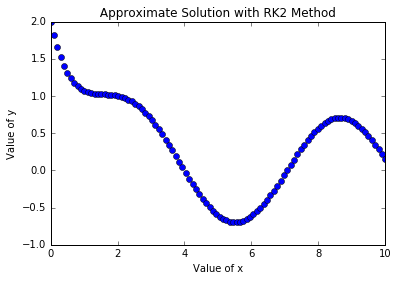

In [9]:
# 1) chiamiamo la nostra function con gli stessi parametri 
x,y=rk2(f, 0., 2., 10. ,n=100) 

# 2) plot della soluzione da confrontare con quello ottenuto 
#    col metodo di Eulero.
plt.plot(x,y,'o')
plt.xlabel("Value of x" )
plt.ylabel("Value of y" )
plt.title(" Approximate Solution with RK2 Method " )
plt.show()


Come abbiamo visto a lezione, e' possibile ricavare formule di Runge-Kutta con diversi gradi di accuratezza (e anche complicazione   algebrica). Tuttavia, siccome il metodo piu' diffuso e' quello di ordine 4, di seguito scriviamo un codice che utilizza le relazioni ricavate per questo ordine (vedi eq.1.52 delle dispense)
### Runge-Kutta di ordine 4.

In [10]:
def rk4( f, y0, x ):
    """ Metodo di Runge-Kutta di ordine 4 per risolvere la y' = f(y,x) 
        with y(x[0]) = y0.

    USAGE:     x = rk4(f, y0, x)

    INPUT:
        f      - funzione di x ed y uguale a dy/dx.  y puo' avere piu' 
                 valori, nel qual caso: 
                   - y potra' essere una "list" o un "NumPy array"
                   - f dovra' produrre un NumPy array della stessa 
                       dimensione di y.
        y0     - condizione(i) iniziale(i).  Specifica il valore di y 
                 per x=x[0]. E' uno scalare oppure, se si tratta di 
                 risolvere un sistema di piu' equazioni, potra' essere 
                 una lista o un numpy array.

        x      - list o NumPy array di valori per la x ai quali calcolare 
                 la soluzione. Il primo valore x[0] e' il punto a cui si 
                 applica la condizione iniziale y0 e lo step size h e' 
                 determianto dalla differenza  h=x[i+1]-x[i].

    OUTPUT:
        y     - NumPy array contenente ui valori della soluzione 
                corrispondente a ciascun valore presente nell'array 
                delle x.  Se si sta risolvendo un sistema di eq. 
                differenziali allora y sara' un array di arrays.

        Vedi equazioni (1.55) delle dispense 
    """

    n = len( x )
    y = np.array( [ y0 ] * n )
    y = y.astype(float)         # se sono interi li traduco in float 
    for i in range( n - 1 ):
        h  = x[i+1] - x[i]
        k1 = h * f( x[i], y[i] )
        k2 = h * f( x[i] + 0.5 * h, y[i] + 0.5 * k1)
        k3 = h * f( x[i] + 0.5 * h, y[i] + 0.5 * k2 )
        k4 = h * f( x[i+1] , y[i] + k3)
        y[i+1] = y[i] + ( k1 + 2.0 * ( k2 + k3 ) + k4 ) / 6.0

#        k2 = h * f( x[i] + 0.5 * k1, t[i] + 0.5 * h )
#        k3 = h * f( x[i] + 0.5 * k2, t[i] + 0.5 * h )
#        k4 = h * f( x[i] + k3, t[i+1] )
#        x[i+1] = x[i] + ( k1 + 2.0 * ( k2 + k3 ) + k4 ) / 6.0

    return x,y


In [11]:
# per provare RK4
x   = np.linspace(0, 10, 100) 
x,y = rk4(f, 2, x)
plt.plot(x,y,'o')
plt.xlabel("Value of x" )
plt.ylabel("Value of y" )
plt.title(" Approximate Solution with RK4 Method " )
plt.show()

# Confronto 
Possiamo ora confrontare i risultati ottenuti per la soluzione dell'equazione differenziale $f$ con i tre diversi approcci sviluppati: eulero, rk2 (Runge-Kutta di ordine 3), ed rk4 ( Runge-Kutta di ordine 4)

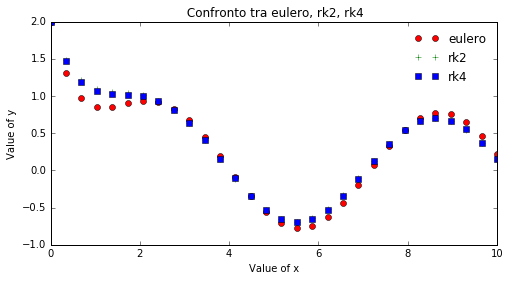

In [12]:
n=30
x1,y1=eulero(f,0,2,10.,n=n);
x2,y2=rk2(f, 0 ,2, 10.,n=n); 

# per rk4() i parametri di input sono diversi
x    = np.linspace(0, 10, n) 
x3,y3=rk4(f, 2, x)

# definisco la dimensione del plot (rimane attiva sempre)
plt.rcParams["figure.figsize"] = [8,4]  

plt.plot(x1,y1,'ro', label='eulero')
plt.plot(x2,y2,'g+',label='rk2')
plt.plot(x3,y3,'bs',label='rk4')

# plt.xlim(0,2)
plt.xlabel("Value of x" )
plt.ylabel("Value of y" )
plt.title(" Confronto tra eulero, rk2, rk4" )
plt.legend(frameon=False)

plt.show()
